<a href="https://www.kaggle.com/code/hikmatullahmohammadi/ps-s3-ep5-tf-keras-eda?scriptVersionId=117866357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='0'></a>
# Kaggle PS, S#3, Ep#5. (Wine Quality) using Keras

# Easy Navigation

- [1- Data Exploration](#1)
- [2- Explanatory Data Analysis (EDA)](#2)
    - [2.1- The target variable](#2-1)
    - [2.2- Features distributions](#2-2)
- [3- Data Preprocessing](#3)
- [3- Modeling (DNN)](#4)
    - [3.1- Model Construction](#4-1)
    - [3.2- Model Utilization & Submission](#4-2)

## Dataset Description:

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.<br><br>

A simple yet challenging project, to anticipate the quality of wine. The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.<br><br>

Can you overcome these obstacles & build a good predictive model to classify them?<br><br>
**This data frame contains the following columns:**<br>
Input variables (based on physicochemical tests):<br>
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

<br><br>
**Objective:**<br>
Build classification models to predict the wine quality.

<a id='1'></a>
# 1- Data Exploration

In [1]:
# import required libraies/dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [2]:
# load the datasets
df_train = pd.read_csv('/kaggle/input/playground-series-s3e5/train.csv', index_col=0)
df_test = pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv', index_col=0)
df_orig = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv', index_col=12)

In [3]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
# combine with the original dataset
df_train = pd.concat([df_train, df_orig])
df_train.index = np.arange(df_train.shape[0])
df_train.shape

(3199, 12)

In [5]:
# look for missing values
df_train.isnull().sum().sum()

0

<a id='2'></a>
# 2- Explanatory Data Analysis (EDA)

In [6]:
# extract categorical and numerical features
cate_features = ['quality']
numeric_features = list(set(df_train.columns)  - set(cate_features))

In [7]:
## utils/functions

# draw distribution plot for a numeric feature
def draw_numeric_dist(df, feature):
    sns.kdeplot(df[feature]) 
    ax = sns.distplot(df[feature])
    ax.set_title(f'{feature} Distribution', fontdict={'fontsize': 18})

# draw boxen plot for a numeric feature vs quality
def draw_numeric_target_boxen(df, feature):
    ax = sns.boxenplot(data=df, x='quality', y=feature)
    ax.set_title(f'{feature} VS quality', fontdict={'fontsize': 18})


<a id='2-1'></a>
## 2.1- Target Variable

Let's see the target's distribution

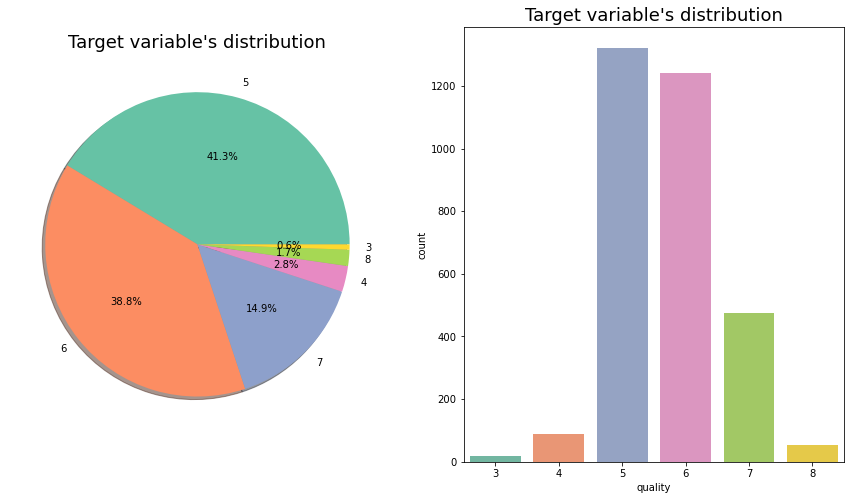

In [8]:
# draw plots to see how the target variable is distributed

plt.figure(figsize=(15, 8))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
plt.pie(
    x = df_train['quality'].value_counts(),
    labels=df_train['quality'].value_counts().index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=0
)
plt.title(f'Target variable\'s distribution' , fontdict={'fontsize': 18})    

plt.subplot(1, 2, 2)
ax = sns.countplot(df_train['quality'])
ax.set_title(f'Target variable\'s distribution' , fontdict={'fontsize': 18})
plt.show()    

<a id='2-2'></a>
## 2.2- Features Distributions

**NOTE:**<br>
In this section we will visualize how each numeric feature is distributed, and how the distribution of each particular feature has an impact on the raget variable.

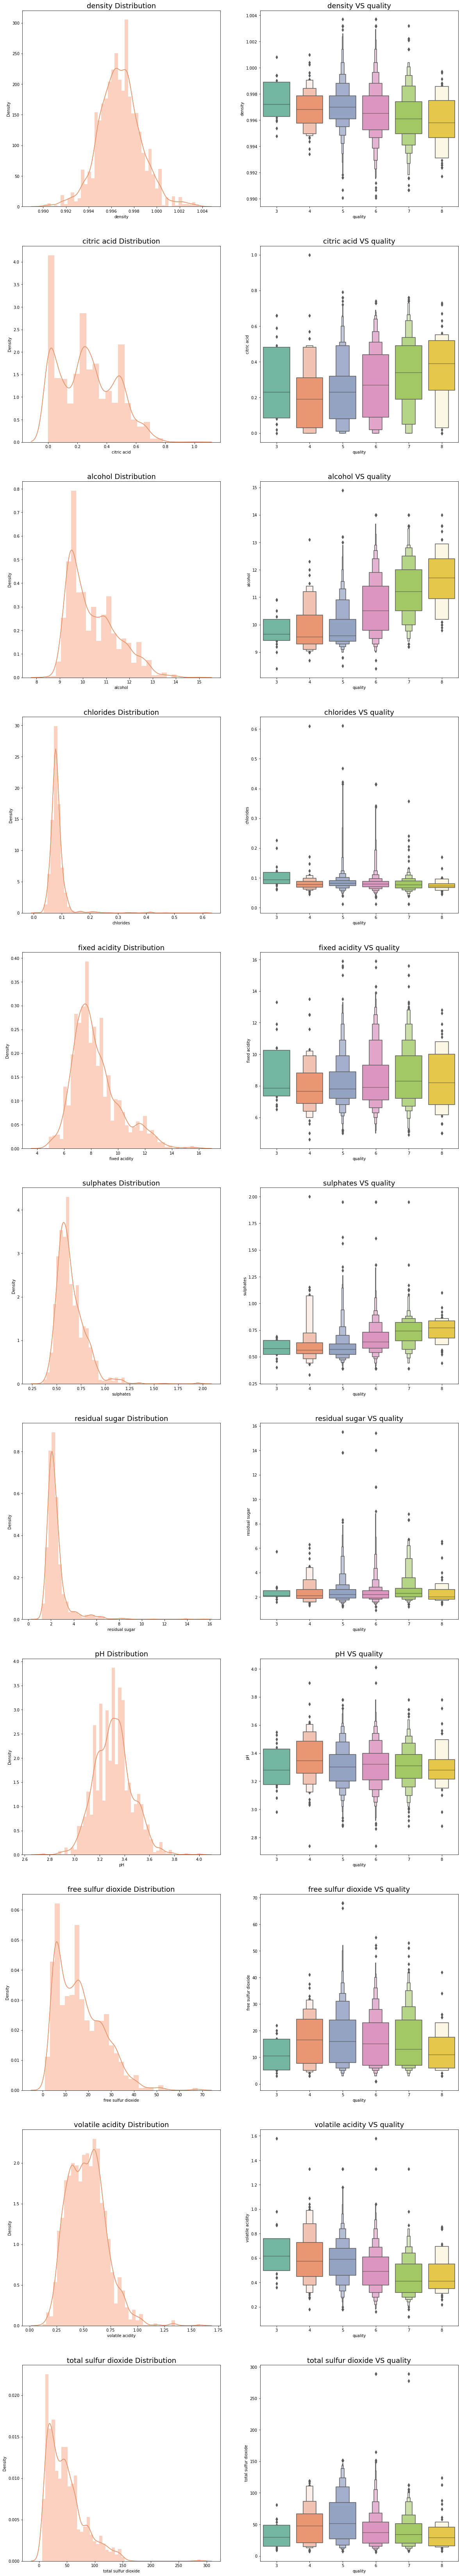

In [9]:
# draw some plots for all numeric features [+ vs quality]
plt.figure(figsize=(20, 120))
sns.set_palette('Set2')

i = 1
for feature in numeric_features:
    # dist
    plt.subplot(len(numeric_features), 2, i)
    draw_numeric_dist(df_train, feature)
    # box
    plt.subplot(len(numeric_features), 2, i+1)
    draw_numeric_target_boxen(df_train, feature)
    i += 2
    
plt.show()    

Above-displayed figures are quite self-explaining. Hence, I leave it to you to look at them and grasp how particular features are distributed, and how they have an impact on the target variable

<a id='3'></a>
# 3- Preprocessing

In [10]:
# separate features from the target variable
X = df_train.drop('quality', axis=1)
y = df_train['quality']

In [11]:
# encode the target varibale, 0, 1, 2, 3, ..
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [12]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df_test = scaler.fit_transform(df_test)

In [13]:
# split the dataset into train and val sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=10, test_size=0.1)

In [15]:
# define the training and the test sets
training_set = tf.data.Dataset.from_tensors((X_train, y_train))
val_set = tf.data.Dataset.from_tensors((X_val, y_val))
test_set = tf.data.Dataset.from_tensors((df_test,))

In [16]:
# define batches
training_batches = training_set.batch(128)
val_batches = val_set.batch(128)
test_batches = test_set.batch(128)

<a id='4'></a>
# 4- Modeling

<a id='4-1'></a>
## 4.1- Training

In [19]:
# Build the model
def build_model(input_shape, num_classes):
    # input layer
    inputs =  keras.Input(shape=input_shape)
    
    # hidden layers
    x = layers.Dense(1024, activation='relu')(inputs)
    x = layers.Dropout(.5)(x)
    
    x = layers.Dense(2048, activation='relu')(x)
    x = layers.Dropout(.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(.4)(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(.3)(x)
    
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(.2)(x)
    
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    
    # output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return keras.Model(inputs, outputs)

model = build_model(input_shape=(None, 11), num_classes=6)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, 11)]        0         
_________________________________________________________________
dense_19 (Dense)             (None, None, 1024)        12288     
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 1024)        0         
_________________________________________________________________
dense_20 (Dense)             (None, None, 2048)        2099200   
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 2048)        0         
_________________________________________________________________
dense_21 (Dense)             (None, None, 1024)        2098176   
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 1024)        0   

In [20]:
# compile and train the model
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 200

history = model.fit(training_batches, validation_data=val_batches, epochs=EPOCHS, verbose=0)

2023-01-31 20:40:42.543530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-31 20:40:51.415418: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


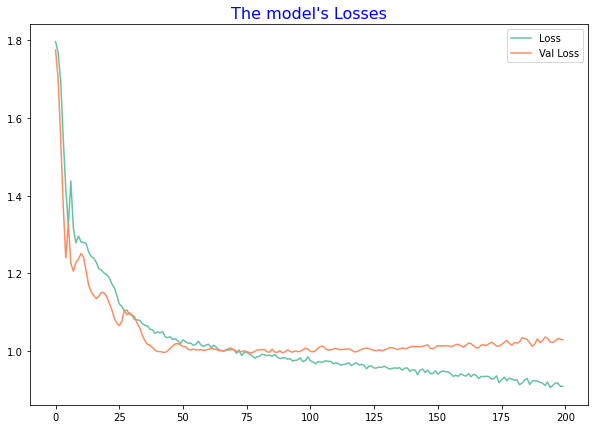

In [21]:
# let's plot the losses
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'])
plt.title('The model\'s Losses', fontdict={'fontsize': 16, 'color': 'blue'})
plt.show()

In [22]:
# Cohen Kappa Score
from sklearn.metrics import cohen_kappa_score

# predict on the val set
y_preds = model.predict(val_batches)
y_preds = np.argmax(y_preds, axis=-1).flatten()

ck_score = cohen_kappa_score(y_preds,  y_val, weights = "quadratic")
ck_score

0.511737089201878

<a id='4-2'></a>
## 4.2- Submission

In [23]:
# predict on the test set
test_preds = model.predict(test_batches)
test_preds = np.argmax(test_preds, axis=-1).flatten()

In [24]:
# decode the target varibale back to original
test_preds = encoder.inverse_transform(test_preds)

In [25]:
# create submission file
sub = pd.read_csv('/kaggle/input/playground-series-s3e5/sample_submission.csv')
sub['quality'] = test_preds
sub.head()

,Id,quality
0,2056,5
1,2057,5
2,2058,5
3,2059,6
4,2060,6


In [26]:
# write to submission file
sub.to_csv('./submission.csv', index=False)
print('Done...')

Done...


# Thanks :)
By: <br>
[Hikmatullah Mohammadi](https://kaggle.com/hikmatullahmohammadi)<br>

[Go to top](#0)